# Classification -> Supervised ML -> predicting a discrete value

## Classification ML Algo
- Logistic Regression : probabilistic
- Naive Bayes : probabilistics
- tree based 
  - Decision Tree Classification
  - Ensemble ALgo
      - RandomForest
  - Boosting
      - AdaBoost
      - Gradient Boost
      - Xtreme Gradient Boost
- Support Vection MAchine
- Knn
- Neural Network

## Logistic Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("data/diabetes_example.csv")

In [4]:
df

,bsl,diabetes
0,190,No
1,240,Yes
2,300,Yes
3,160,No
4,200,Yes
5,205,Yes
6,269,Yes
7,129,No
8,141,No
9,218,No


### build a model to predict if an individual is diabetic(Yes) or non diabetic(No)
- Yes ->1 ( +ve )
- No ->0 ( -ve )

In [5]:
df['diabetes']=df['diabetes'].replace({'Yes':1,'No':0})

In [6]:
df

,bsl,diabetes
0,190,0
1,240,1
2,300,1
3,160,0
4,200,1
5,205,1
6,269,1
7,129,0
8,141,0
9,218,0


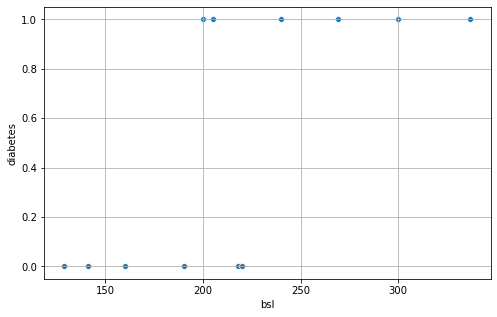

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bsl', y='diabetes', data=df)
plt.grid(True)

In [10]:
iris=pd.read_csv("data/iris_flowers.csv")

In [11]:
iris[:3]

,sepallength,sepalwidth,petallength,petalwidth,class
0,6.0,2.2,5.0,1.5,Iris-virginica
1,5.1,2.5,3.0,1.1,Iris-versicolor
2,5.0,2.3,3.3,1.0,Iris-versicolor


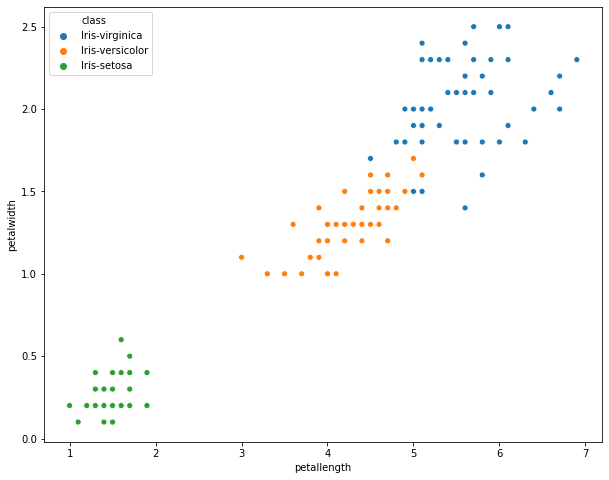

In [13]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='petallength', y='petalwidth', hue='class', data=iris)

In [17]:
v=np.arange(-10, 10, .01)

In [19]:
v.shape

(2000,)

In [20]:
sigmoid=lambda v: 1/(1+np.exp(-v))

In [21]:
np.exp(-2) # e**-2

0.1353352832366127

In [22]:
sigmoid(-500)

7.124576406741285e-218

In [23]:
v[:5]

array([-10.  ,  -9.99,  -9.98,  -9.97,  -9.96])

In [24]:
sigvalue=sigmoid(v)

In [25]:
list(zip(v[-5:],sigvalue[-5:]))

[(9.949999999999577, 0.9999522746438816),
 (9.959999999999575, 0.9999527494966711),
 (9.969999999999573, 0.9999532196250409),
 (9.979999999999574, 0.9999536850759906),
 (9.989999999999576, 0.9999541458960529)]

In [26]:
np.max(sigvalue)

0.9999541458960529

In [27]:
np.min(sigvalue)

4.5397868702434395e-05

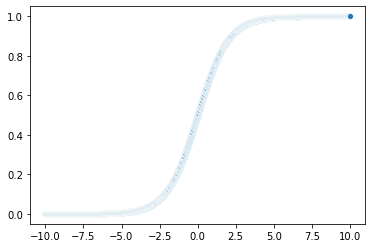

In [28]:
sns.scatterplot(x=v,y=sigvalue)

In [29]:
from sklearn import linear_model

In [30]:
df=pd.read_csv("data/diabetes_example.csv")

In [31]:
df['diabetes']=df['diabetes'].replace({'Yes':1,'No':0})

In [32]:
X=df['bsl'].values.reshape(-1,1)

In [33]:
y=df['diabetes']

In [34]:
model=linear_model.LogisticRegression()

In [35]:
model.fit(X,y)

LogisticRegression()

In [36]:
model.intercept_

array([-11.10118899])

In [37]:
model.coef_

array([[0.0522658]])

In [38]:
model.coef_[0,0]

0.05226580064636148

In [39]:
probs=model.predict_proba(X)

In [40]:
predicted=(probs[:,1]>=.5).astype(np.int)

In [41]:
predicted=model.predict(X)

In [42]:
probs

array([[0.76326915, 0.23673085],
       [0.19114256, 0.80885744],
       [0.01016537, 0.98983463],
       [0.93926976, 0.06073024],
       [0.65656613, 0.34343387],
       [0.595488  , 0.404512  ],
       [0.04934516, 0.95065484],
       [0.98736914, 0.01263086],
       [0.97660845, 0.02339155],
       [0.4273294 , 0.5726706 ],
       [0.4019643 , 0.5980357 ],
       [0.00148273, 0.99851727]])

In [43]:
probs[:,1]

array([0.23673085, 0.80885744, 0.98983463, 0.06073024, 0.34343387,
       0.404512  , 0.95065484, 0.01263086, 0.02339155, 0.5726706 ,
       0.5980357 , 0.99851727])

In [44]:
list(zip(y,probs))

[(0, array([0.76326915, 0.23673085])),
 (1, array([0.19114256, 0.80885744])),
 (1, array([0.01016537, 0.98983463])),
 (0, array([0.93926976, 0.06073024])),
 (1, array([0.65656613, 0.34343387])),
 (1, array([0.595488, 0.404512])),
 (1, array([0.04934516, 0.95065484])),
 (0, array([0.98736914, 0.01263086])),
 (0, array([0.97660845, 0.02339155])),
 (0, array([0.4273294, 0.5726706])),
 (0, array([0.4019643, 0.5980357])),
 (1, array([0.00148273, 0.99851727]))]

## iris dataset

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
iris=pd.read_csv('data/iris_flowers.csv')

## build model to predict flower (iris) is virginica or not
- Binary classification

In [47]:
iris[:3]

,sepallength,sepalwidth,petallength,petalwidth,class
0,6.0,2.2,5.0,1.5,Iris-virginica
1,5.1,2.5,3.0,1.1,Iris-versicolor
2,5.0,2.3,3.3,1.0,Iris-versicolor


## target (y) : 'class' contains 3 string values --> need to change to contaiin 2 numeric values

In [48]:
iris['type']=(iris['class']=='Iris-virginica').astype(np.int)

In [49]:
iris[:3]

,sepallength,sepalwidth,petallength,petalwidth,class,type
0,6.0,2.2,5.0,1.5,Iris-virginica,1
1,5.1,2.5,3.0,1.1,Iris-versicolor,0
2,5.0,2.3,3.3,1.0,Iris-versicolor,0


## created new column : 'type' --> new target(y)

### -ve -->0 --> non virginica , +ve -->1 --> virginica


In [50]:
X=iris.drop( ['class','type'],axis=1  )

In [51]:
y=iris['type']

In [52]:
iris.shape

(150, 6)

In [53]:
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.15,random_state=42)

In [54]:
model=linear_model.LogisticRegression()
model.fit(Xtrain,ytrain)

LogisticRegression()

In [55]:
model.coef_ # 2D !!!!  1 row , 4 columns

array([[-0.30932115, -0.58668186,  2.75858841,  2.16301205]])

In [56]:
model.coef_[0]

array([-0.30932115, -0.58668186,  2.75858841,  2.16301205])

In [57]:
probtest=model.predict_proba(Xtest)

In [58]:
predtest=model.predict(Xtest)
predtrain=model.predict(Xtrain)

In [59]:
predtest

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0])

In [60]:
list(zip(ytest,predtest))

[(0, 0),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0)]

In [61]:
from sklearn import metrics

In [62]:
metrics.confusion_matrix(ytest,predtest) # test data

array([[13,  0],
       [ 1,  9]], dtype=int64)

In [63]:
metrics.accuracy_score(ytest,predtest) # 95.65 % (test data)

0.9565217391304348

In [64]:
metrics.accuracy_score(ytrain,predtrain)

0.968503937007874

In [65]:
metrics.recall_score(ytrain,predtrain)

0.95

In [66]:
metrics.recall_score(ytest,predtest)

0.9

In [67]:
metrics.precision_score(ytest,predtest)

1.0

In [68]:
metrics.roc_auc_score(ytrain,predtrain)

0.9635057471264368

In [69]:
metrics.roc_auc_score(ytest,predtest)

0.95